In [25]:
from term_grouping import *
import matplotlib.pyplot as plt

plt.rcParams["font.size"] = 13
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["axes.titlesize"] = 15
plt.rcParams["font.family"] = 'sans-serif'

In [5]:
hfile = 'hamiltonians/sampleH2.txt'
H = parseHamiltonian(hfile)

ops = [term[1] for term in H]
Nq = max([len(op) for op in ops])
print('{} qubits'.format(Nq))

for commutativity_type in [QWCCommutativity, FullCommutativity]:
    cliques = genMeasureCircuit(H, Nq, commutativity_type)
    for cliq in cliques:
        print(cliq)
    print()

8 qubits
MEASURECIRCUIT: Generated graph for the Hamiltonian with 184 nodes.
MEASURECIRCUIT: BronKerbosch found 69 unique circuits
{'**ZZ****', 'Z******Z', '***Z***Z', '*******Z', '*****ZZ*', '*Z*Z****', 'Z**Z****', '****Z*Z*', '******Z*', '*****Z**', '*ZZ*****', '*Z******', '******ZZ', 'ZZ******', '***ZZ***', '*Z***Z**', '****Z**Z', '**Z***Z*', 'Z****Z**', '**Z*****', '**Z**Z**', '*Z****Z*', '**Z****Z', 'Z*******', '*Z*****Z', '**Z*Z***', '***Z**Z*', '*Z**Z***', 'Z*****Z*', 'Z***Z***', '****Z***', '***Z****', '*****Z*Z', 'Z*Z*****', '****ZZ**', '***Z*Z**'}
{'*XYYX***', 'XXYY****', '***YXXY*', '**YYXX**', '****XXYY', 'XX****YY'}
{'****YYXX', 'YYXX****', '*YXXY***', 'YY****XX', '***XYYX*', '**XXYY**'}
{'***XXYY*', '*YYXX***', '**YXXY**', '****XYYX', 'XY****YX', 'XYYX****'}
{'YX****XY', '****YXXY', '**XYYX**', 'YXXY****', '*XXYY***', '***YYXX*'}
{'XZZ*X***', 'XZZZX*Z*', 'XZZZXZ**', 'XZZZX**Z', 'X*ZZX***', 'XZZZX***', 'XZ*ZX***'}
{'YZZZY*Z*', 'YZ*ZY***', 'Y*ZZY***', 'YZZZY***', 'YZZZYZ**'

In [ ]:
# What is the effect of term grouping across basis representations?

In [ ]:
# What is the effect of term grouping across qubit encodings?

In [11]:
# What is the effect of term grouping across increasing Active Spaces?
Hfiles = ['hamiltonians/H2_6-31g_JW_0.7_AS{}.txt'.format(a) for a in [1,2,3,4]]

for file in Hfiles:
    print('--------------')
    print(file)
    H = parseHamiltonian(file)
    
    ops = [term[1] for term in H]
    Nq = max([len(op) for op in ops])
    print('{} qubits'.format(Nq))
    
    print('{} total terms\n'.format(len(H)))

    for commutativity_type, type_str in zip([QWCCommutativity, FullCommutativity],['QWC','FULL']):
        print(type_str + 'Commutation:')
        cliques = genMeasureCircuit(H, Nq, commutativity_type)
        print()

--------------
hamiltonians/H2_6-31g_JW_0.7_AS1.txt
2 qubits
4 total terms

QWCCommutation:
MEASURECIRCUIT: Generated graph for the Hamiltonian with 3 nodes.
MEASURECIRCUIT: BronKerbosch found 1 unique circuits

FULLCommutation:
MEASURECIRCUIT: Generated graph for the Hamiltonian with 3 nodes.
MEASURECIRCUIT: BronKerbosch found 1 unique circuits

--------------
hamiltonians/H2_6-31g_JW_0.7_AS2.txt
4 qubits
15 total terms

QWCCommutation:
MEASURECIRCUIT: Generated graph for the Hamiltonian with 14 nodes.
MEASURECIRCUIT: BronKerbosch found 5 unique circuits

FULLCommutation:
MEASURECIRCUIT: Generated graph for the Hamiltonian with 14 nodes.
MEASURECIRCUIT: BronKerbosch found 2 unique circuits

--------------
hamiltonians/H2_6-31g_JW_0.7_AS3.txt
6 qubits
62 total terms

QWCCommutation:
MEASURECIRCUIT: Generated graph for the Hamiltonian with 61 nodes.
MEASURECIRCUIT: BronKerbosch found 17 unique circuits

FULLCommutation:
MEASURECIRCUIT: Generated graph for the Hamiltonian with 61 nodes.


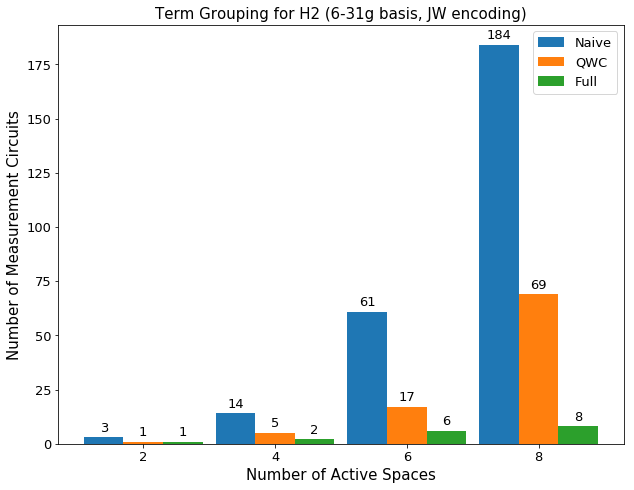

In [29]:
# copying the data printed out above
naive = (3,14,61,184)
qwc   = (1,5,17,69)
full  = (1,2,6,8)

# active spaces (x-axis)
# There is a weird naming convention...
# Openfermion lists active spaces as 1,2,3,4
# But, active spaces always come in pairs so there are actually
# twice as many spaces as what Openfermion says there is... its confusing
AS = np.array((1,2,3,4))

width = 0.3

fig, ax = plt.subplots(figsize=(9,7))
rects1 = ax.bar(AS - width, naive, width, label='Naive')
rects2 = ax.bar(AS, qwc, width, label='QWC')
rects3 = ax.bar(AS + width, full, width, label='Full')

ax.set_ylabel('Number of Measurement Circuits')
ax.set_xlabel('Number of Active Spaces')
ax.set_title('Term Grouping for H2 (6-31g basis, JW encoding)')
ax.set_xticks(AS)
ax.set_xticklabels(('2', '4', '6', '8'))
ax.legend()


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()